In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# import hddm
from sys import platform
import numpy as np
import seaborn as sns
import pandas as pd
from jupyterthemes import jtplot
import matplotlib.pyplot as plt



jtplot.style(theme='onedork')
jtplot.style(context='poster', fscale=2, spines=False, gridlines='--')
sns.set_color_codes("muted")

In [2]:
if platform == 'linux2':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/Krista/'

In [3]:
subj_df_all = pd.read_csv(home + 'Dropbox/loki_0.5/analysis/aggregated_data/subjectwise_ddm_reg.csv')
subj_dics_all = pd.read_csv(home + 'Dropbox/loki_0.5/analysis/aggregated_data/subjectwise_dics_reg.csv' )

In [4]:
subj_df = subj_df_all.loc[subj_df_all.model == 'a_cpp_v_B']
subj_dics = subj_dics_all.loc[(subj_dics_all.model == 'a_cpp_v_B') | (subj_dics_all.model == 'v_cpp_a_B')]

In [5]:
np.arange(4)

array([0, 1, 2, 3])

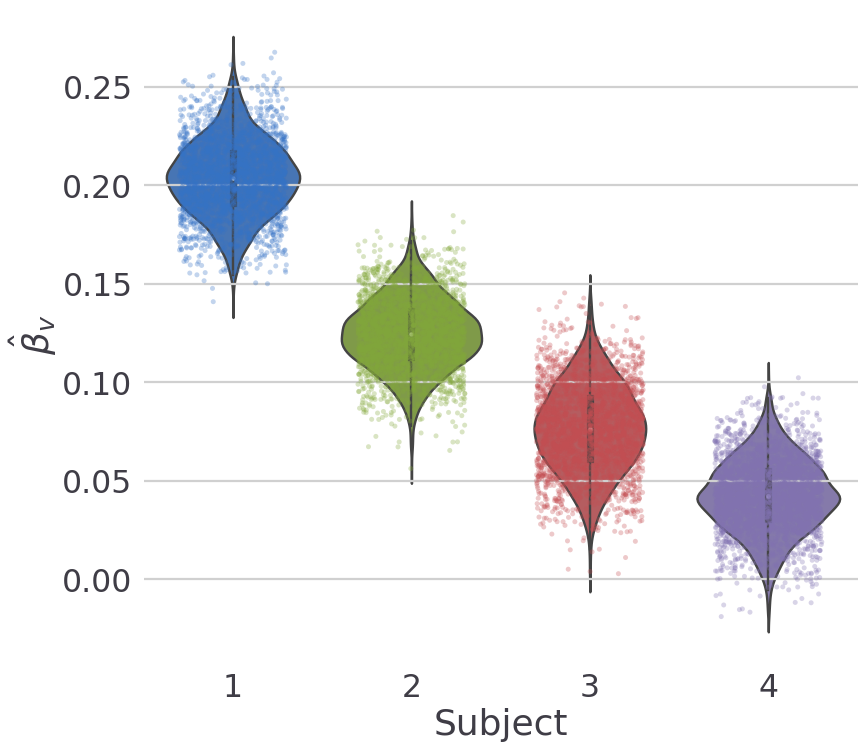

In [6]:
jtplot.style(context='poster', fscale=3, spines=False, theme='grade3')
sns.set_color_codes("muted")

sns.violinplot(x='subj_idx', y='v_ideal_B_shifted', data=subj_df)
sns.stripplot(x='subj_idx', y='v_ideal_B_shifted', data=subj_df, alpha=0.3, jitter=0.30)
# plt.ylabel(r'$v \textasciitilde B$')
plt.ylabel(r'$\hat\beta_{v}$')

plt.xlabel('Subject')
plt.xticks(np.arange(4), np.arange(1,5))
plt.tight_layout()
plt.savefig(home+'Dropbox/loki_0.5/analysis/figures/subj_vB_betas_v2.pdf',dpi=300) #add rotated labels

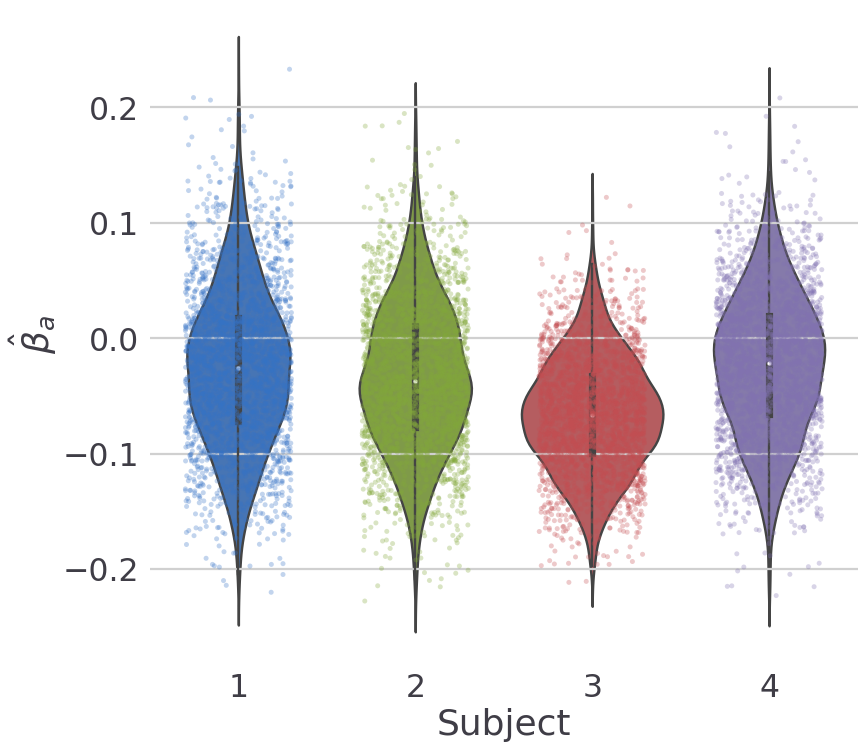

In [7]:
jtplot.style(context='poster', fscale=3, spines=False, theme='grade3')
sns.set_color_codes("muted")

sns.violinplot(x='subj_idx', y='a_cpp_shifted', data=subj_df)
sns.stripplot(x='subj_idx', y='a_cpp_shifted', data=subj_df, alpha=0.3, jitter=0.30)
# plt.ylabel(r'$a \textasciitilde \Omega$')
plt.ylabel(r'$\hat\beta_{a}$')
plt.xticks(np.arange(4), np.arange(1,5))
plt.xlabel('Subject')
plt.tight_layout()
plt.savefig(home+'Dropbox/loki_0.5/analysis/figures/subj_aCPP_betas_v2.pdf',dpi=300) #add rotated labels

In [8]:
formatted_model_names = [r'$a\textasciitilde\Omega + v\textasciitilde B$', r'$a\textasciitilde B + v\textasciitilde\Omega$']
model_names = ['a_cpp_v_B', 'v_cpp_a_B']
model_order = model_names

In [9]:
subj_dics['subject_num'] = np.repeat(np.arange(1,5),2)

/Users/Krista/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
subj_dics['fake_dic'] = 0

/Users/Krista/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
subj_dics

,Unnamed: 0,subj_idx,model,null_adj_dic,raw_dic,subject_num
2,2,786,a_cpp_v_B,-113.784050,5496.641225,1
6,6,786,v_cpp_a_B,-14.433934,5595.991341,1
9,9,787,a_cpp_v_B,-42.348536,5392.700417,2
13,13,787,v_cpp_a_B,-22.788774,5412.260179,2
16,16,788,a_cpp_v_B,-9.417553,3157.521296,3
20,20,788,v_cpp_a_B,-4.204535,3162.734314,3
23,23,789,a_cpp_v_B,-1.252555,5456.290871,4
27,27,789,v_cpp_a_B,1.629079,5459.172505,4


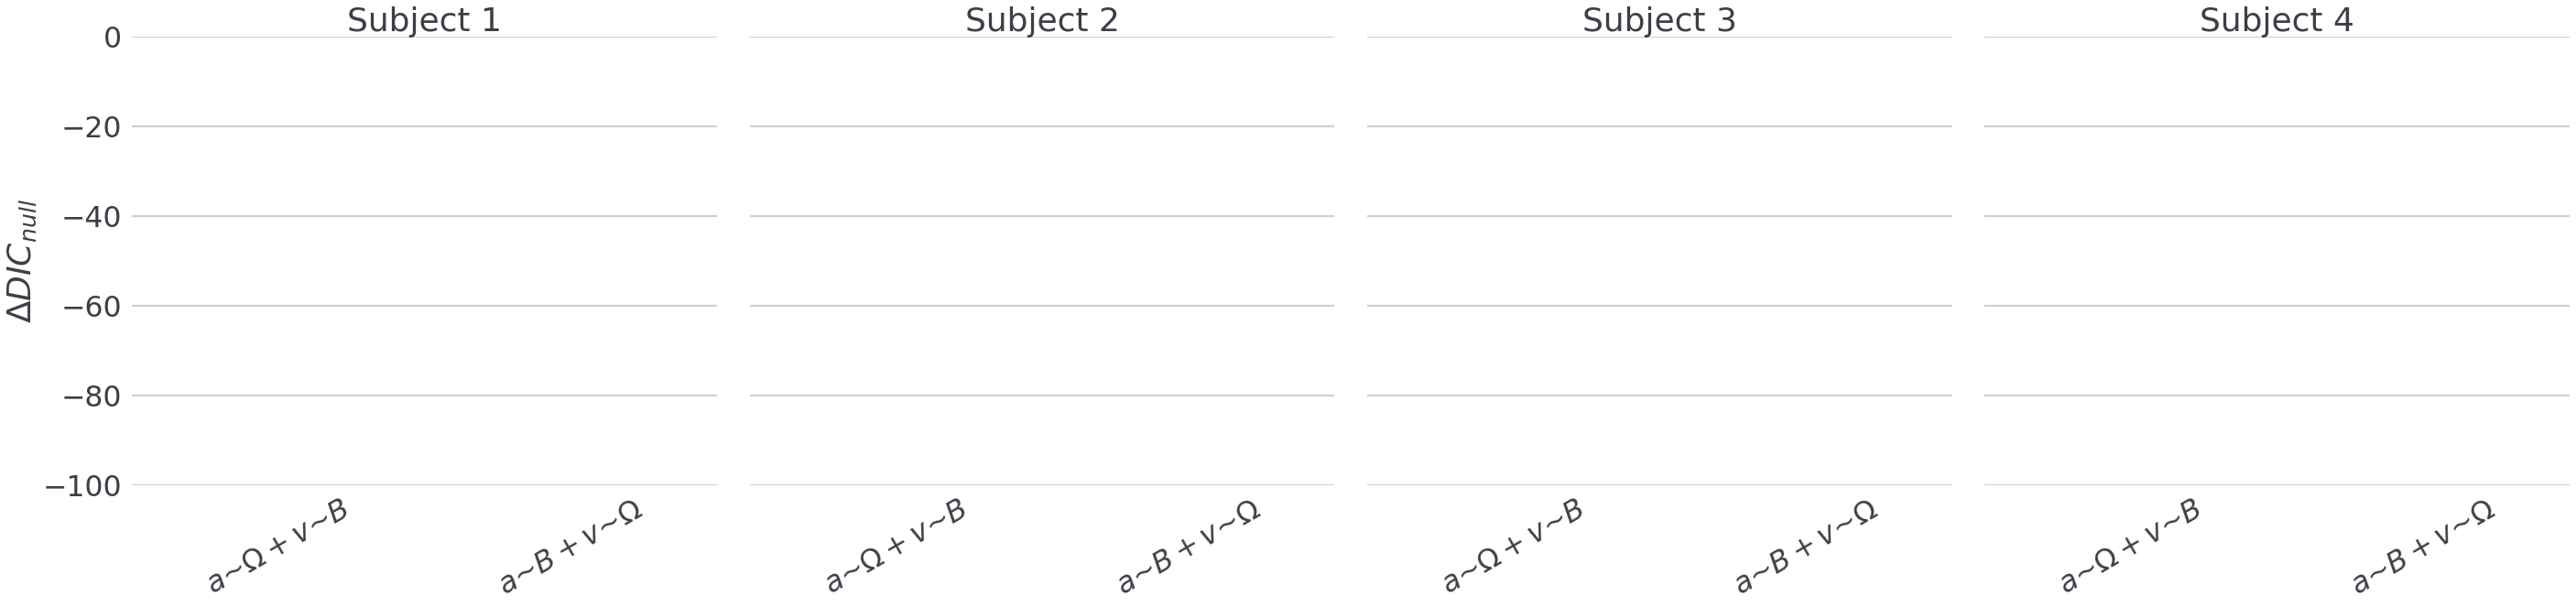

In [106]:
jtplot.style(context='poster', fscale=3, spines=False, theme='grade3')
sns.set_color_codes("muted")


g = sns.FacetGrid(subj_dics, col='subject_num', height=10, hue='subj_idx')
(g.map(sns.barplot, "model", "fake_dic", order=model_order).set_titles('Subject {col_name}'))
g.set_ylabels(r'$\Delta DIC_{null}$')
g.set_xticklabels(labels=formatted_model_names, rotation=30)
g.set_xlabels('')
plt.tight_layout()
plt.ylim([-100,0])
# plt.savefig(home+'Dropbox/loki_0.5/analysis/figures/subj_model_comparison_v2.pdf',dpi=300) #add rotated labels
plt.savefig(home+'Dropbox/loki_0.5/analysis/figures/subj_model_comparison_blank.pdf',dpi=300) #add rotated labels

In [95]:
g.data = []